# Proyecto Final: Codigo Huffman
## Matematicas Avanzadas para Computacion
### Jonathan Valencia

In [228]:
from anytree.exporter import DotExporter
from PIL import Image
from anytree import Node, RenderTree, NodeMixin
import bitarray
from bitarray import bitarray
from dataclasses import dataclass
import os
import pickle

Empleamos las librerias de python:
- anytree
- bitarray

In [229]:
@dataclass
class Nodes(NodeMixin):
  def __init__(self,probability, symbol, left = None,right = None):
    self.probability = probability
    self.symbol = symbol
    self.parent = None
    self.left = left
    self.right = right
    if left is not None:
      left.parent = self
    if right is not None:
      right.parent = self
    self.code : str = ''

Comenzamos con una funcion para calcular los pesos de los simbolos dentro de nuestro texto

In [230]:
def CalculateWeights(data : dict):
  symbols = dict()
  for item in data:
    if symbols.get(item) == None:
      symbols[item] = 1
    else:
      symbols[item] += 1
  return symbols

Luego una funcion para imprimir los simbolos al traversar el arbol Huffman

In [231]:
def CalculateCodes(the_codes : dict, node : Nodes, value = ''):

  newValue = ''.join((value,node.code))

  if(node.left):
      CalculateCodes(the_codes, node.left, newValue)
  if(node.right):
      CalculateCodes(the_codes, node.right, newValue)

  if(not node.left and not node.right):
      the_codes[node.symbol] = bitarray(newValue)
          
  return the_codes

Encoding a traves de Huffman:

In [232]:
def HuffmanEncodingTree(the_data):
    weightTable = CalculateWeights(the_data)
    the_nodes = []

    #convertimos simbolos a nodos de arbol Huffman
    for symbol in weightTable:
      the_nodes.append(Nodes(weightTable[symbol], symbol))

    while len(the_nodes) > 1:  
        # hacemos un sorting de los nodos basados en probabilidad de aparecer  
        the_nodes = sorted(the_nodes, key = lambda x: x.probability)
        # tomamos los 2 nodos mas pequeños
        right = the_nodes[0]
        left = the_nodes[1]
        left.code = '0'
        right.code = '1'
        # tomamos esos nodos y creamos unos nuevo  
        newNode = Nodes(left.probability + right.probability, left.symbol + right.symbol, left, right)
        

        the_nodes.remove(left)
        the_nodes.remove(right)
        the_nodes.append(newNode)
        
    return the_nodes[0]

Nuestro texto original:

In [233]:
txt = "You have not seen, so I forgive your jest, said Gimli. But you speak like a fool. Do you think those halls are fair where your King dwells under the hill in Mirkwood, and dwarves helped in their making long ago? They are but hovels compared with the caverns I have seen here: immeasurable halls, filled with an everlasting music of water that tinkels into pools, as fair Kheled-zaram in the starlight.And, Legolas, when the torches are kindled and men walk on the sandy floors under the echoing domes, ah! then, Legolas, gems and crystals and veins of precious ore glint in the polished walls; and the light glows through folded marbles,, shell-like, translucent as the living hands of Queen Galadriel. There are columns of white and saffron and dawn-rose, Legolas, fluted and twisted into dreamlike forms; they spring up from many-coloured floors to meet the glistening pendants of the roof: wings, ropes, curtains fine as frozen clouds; spears banners, pinnacles of suspended palaces! Still lakes mirror them: a glimmering world looks up from dark pools covered with clear glass; cities, such as the mind of Durin could scarce have imagined in his sleep, stretch on through avenues and pillared courts, on into dark recesses where no light can come. And plink! a silver drop falls, and the round wrinkles in the glass make all the towers bend and waver like weeds and corals in a grotto of the sea. Then evening comes: they fade and twinkle out; the torches pass on into another chamber and another dream. There is chamber after chamber, Legolas; hall opening out of hall, dome after dome, stair beyond stair; and still the winding paths lead on into the mountains heart. Caves! The Caverns of Helms Deep! Happy was the chance that drove me there! It makes me weep to leave them.Then I wish you this fortune and comfort, Gimli, said the Elf, that you may come safe from war and return to see them again. But do not tell all your kindred! There seems little left for them to do, from your account. Maybe the men of this land are wise to say little: one family of busy dwarves with hammer and chisel might mar more than they made.No, you do not understand, said Gimli. No dwarf could be unmoved by such loveliness. None of Durins race would mine those caves for stones or or, not if diamonds and gold could be got there. Do you cut down groves of blossoming trees in the springtime for firewood? We would tend these glades of flowering stone, not quarry them. With cautious skill, tap by tapa small chip of rock and no more, perhaps, in a whole anxious day so we could work, and as the years went by, we should open up new ways, and display far chambers that are still dark, glimpsed only as a void beyond fissures in the rock. And lights, Legolas! We should make lights, such lamps as once shone in Khaza-Dum; and when we wished we should drive away the night that has lain there since the hills were made; and when we desired rest, we would let the night return."

Generamos el texto codificado

In [234]:
the_tree_root = HuffmanEncodingTree(txt)
the_codes = dict() 
encoding = CalculateCodes(the_codes,the_tree_root)

## Analisis de nuestro codificado:

In [235]:
with open('encoding.pickle', 'wb') as handle:
    pickle.dump(encoding, handle, protocol=pickle.HIGHEST_PROTOCOL)
encoding_file_size = os.path.getsize("encoding.pickle")

In [236]:
encoding_read_from_file = None
with open('encoding.pickle', 'rb') as handle:
    encoding_read_from_file = pickle.load(handle)

In [237]:
output_bits = bitarray()
output_bits.encode(encoding_read_from_file, txt)
with open('data.bin', 'wb') as handle:
    pickle.dump(output_bits, handle, protocol=pickle.HIGHEST_PROTOCOL)

output_bits_from_file = None
with open('data.bin', 'rb') as handle:
    output_bits_from_file = pickle.load(handle)

compressed_data_with_huffman_encoding = os.path.getsize("data.bin")    


decoding

In [238]:
output_text = ''.join(output_bits_from_file.decode(encoding_read_from_file))

Funcion para revisar el % de compresion de nuestro texto:

In [239]:
with open('uncompressed.txt', 'wb') as f:
  f.write(txt.encode('ascii'))
total_uncompressed_filesize = os.path.getsize("uncompressed.txt")

total_compression_ratio = ((encoding_file_size + compressed_data_with_huffman_encoding)/ float(total_uncompressed_filesize) ) * 100
print("{}% ratio".format(round(total_compression_ratio,2)))

94.94% ratio


Imprimimos el texto de vuelta para corroborar, que en efecto, permance igual:

In [240]:
print(output_text)

You have not seen, so I forgive your jest, said Gimli. But you speak like a fool. Do you think those halls are fair where your King dwells under the hill in Mirkwood, and dwarves helped in their making long ago? They are but hovels compared with the caverns I have seen here: immeasurable halls, filled with an everlasting music of water that tinkels into pools, as fair Kheled-zaram in the starlight.And, Legolas, when the torches are kindled and men walk on the sandy floors under the echoing domes, ah! then, Legolas, gems and crystals and veins of precious ore glint in the polished walls; and the light glows through folded marbles,, shell-like, translucent as the living hands of Queen Galadriel. There are columns of white and saffron and dawn-rose, Legolas, fluted and twisted into dreamlike forms; they spring up from many-coloured floors to meet the glistening pendants of the roof: wings, ropes, curtains fine as frozen clouds; spears banners, pinnacles of suspended palaces! Still lakes m

## Grafo de Huffman

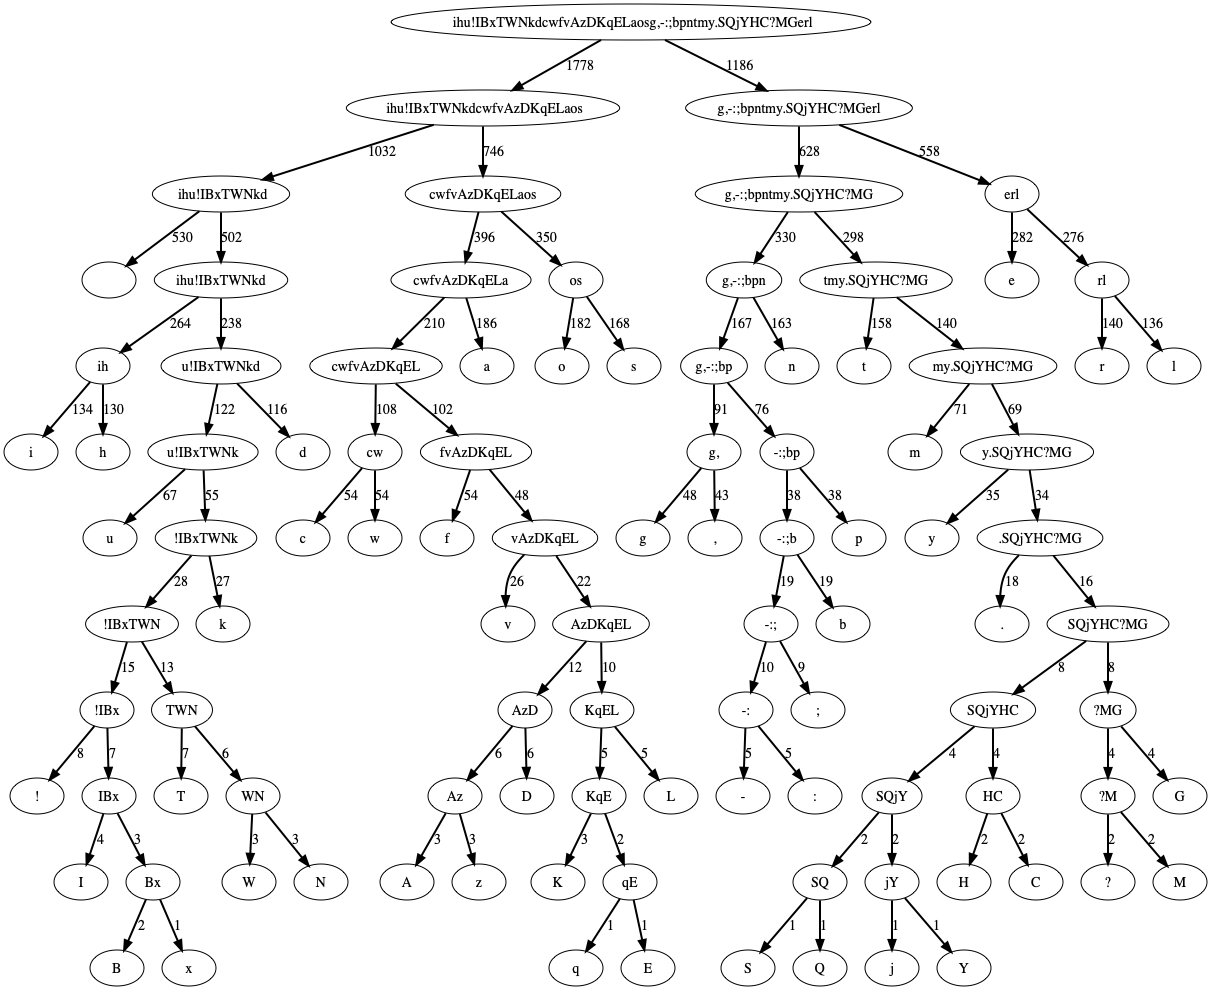

In [241]:
DotExporter(the_tree_root,nodenamefunc=lambda node: node.symbol, edgeattrfunc=lambda parent, child: "style=bold,label=%d" % (child.probability or 0)).to_picture("weight.png")
out = Image.open('weight.png')
display(out)